A short snippet examining the required preprocessing before displaying an image with matplotlib.pyplot.

In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# Read in the original image
image = cv2.imread('../coastal_scene.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# Simulate neural network input by casting to float
image_float = np.array(image, dtype=np.float32)

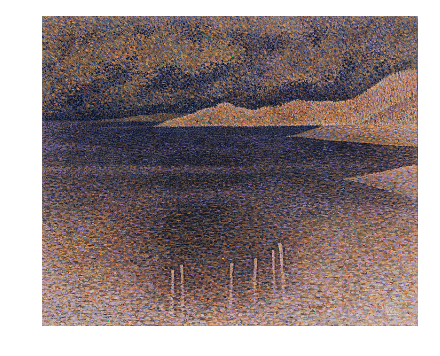

In [4]:
# Display image without any preprocessing
plt.figure()
plt.axis('off')
plt.imshow(image_float)

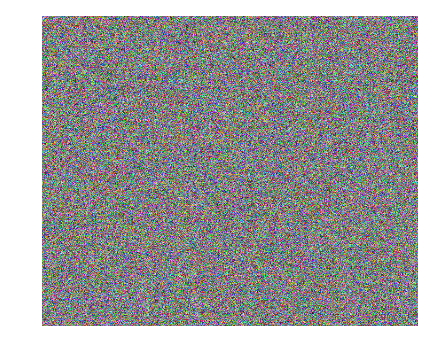

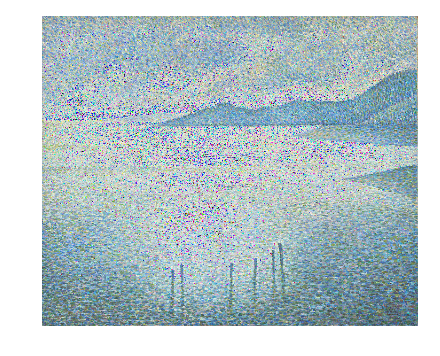

In [5]:
# Simulate invalid pixel values, e.g. greater than 255
height, width, channels = np.shape(image)
image_noise = np.random.rand(height, width, channels) * 50 
image_invalid = image + image_noise
image_invalid_int = np.array(image_invalid, dtype=np.uint8)

# Worst case: invalid pixels and floats
plt.figure()
plt.axis('off')
plt.imshow(image_invalid)

# Slightly better: invalid pixels and uint8
plt.figure()
plt.axis('off')
plt.imshow(image_invalid_int)

In [6]:
def format_image(initial_image):
    """
    Preprocess an image for plt displaying. 
    
    This involves clipping the image to be between 0 and 255, 
    rounding floats to int, and setting the array type to be integers. 
    
    Arguments:
        initial_image: The original image from the node
    Returns:
        converted_image: Image to be shown by plt
    """
    image_clipped = np.clip(initial_image, 0, 255)
    image_rounded = np.rint(image_clipped)
    formatted_image = np.asarray(image_rounded, dtype=np.uint8)
    
    return formatted_image

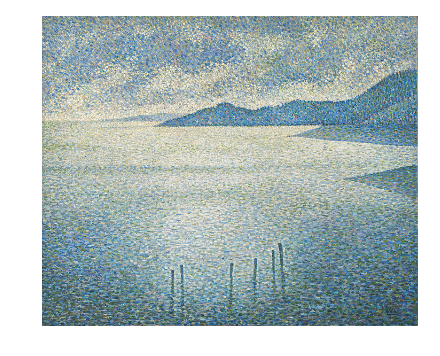

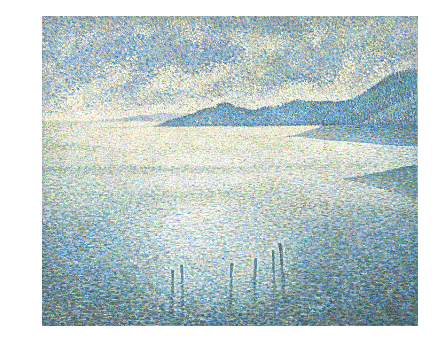

In [7]:
# Fix the images and display the corrected versions
corrected_image_float = format_image(image_float)
corrected_image_invalid = format_image(image_invalid)

plt.figure()
plt.axis('off')
plt.imshow(corrected_image_float)

# This image looks slightly different as some
# there is noise was still added
# However, it isn't as obvious as before since the
# noise is capped to 255
plt.figure()
plt.axis('off')
plt.imshow(corrected_image_invalid)